
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [237]:
# import libraries
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MultiLabelBinarizer

## Directory

In [238]:
def process_json_files(directory_path, output_csv_path):
    """
    Process JSON files in the specified directory, normalize the data, and save it to a CSV file.

    Parameters:
    - directory_path: str, path to the directory containing JSON files.
    - output_csv_path: str, path to save the output CSV file.

    Returns:
    - None
    """
    # List all JSON files in the specified directory
    files = [f for f in os.listdir(directory_path) if f.endswith('.json')]
    print("Files in directory:")
    print(files)

    # Initialize an empty list to store dataframes
    df_list = []

    # Iterate over each JSON file in the directory
    for file_name in files:
        file_path = os.path.join(directory_path, file_name)
        
        # Open and read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        # First level normalization
        df = pd.json_normalize(data['data']['results'])
        
        # Second level normalization
        if 'branding' in df.columns:
            branding = pd.json_normalize(df['branding'].explode())
            branding.columns = [f'branding.{col}' for col in branding.columns]
            df = df.drop('branding', axis=1).join(branding)

        if 'description' in df.columns:
            description = pd.json_normalize(df['description'])
            description.columns = [f'description.{col}' for col in description.columns]
            df = df.drop('description', axis=1).join(description)

        if 'flags' in df.columns:
            flags = pd.json_normalize(df['flags'])
            flags.columns = [f'flags.{col}' for col in flags.columns]
            df = df.drop('flags', axis=1).join(flags)

        if 'lead_attributes' in df.columns:
            lead_attributes = pd.json_normalize(df['lead_attributes'])
            lead_attributes.columns = [f'lead_attributes.{col}' for col in lead_attributes.columns]
            df = df.drop('lead_attributes', axis=1).join(lead_attributes)

        if 'location.address' in df.columns:
            location_address = pd.json_normalize(df['location.address'])
            location_address.columns = [f'location.address.{col}' for col in location_address.columns]
            df = df.drop('location.address', axis=1).join(location_address)

        if 'location.county' in df.columns:
            location_county = pd.json_normalize(df['location.county'])
            location_county.columns = [f'location.county.{col}' for col in location_county.columns]
            df = df.drop('location.county', axis=1).join(location_county)

        if 'products' in df.columns:
            products = pd.json_normalize(df['products'])
            products.columns = [f'products.{col}' for col in products.columns]
            df = df.drop('products', axis=1).join(products)

        # Third level normalization
        if 'location.address.coordinate' in df.columns:
            location_coordinates = pd.json_normalize(df['location.address.coordinate'])
            location_coordinates.columns = [f'location.address.coordinate.{col}' for col in location_coordinates.columns]
            df = df.drop('location.address.coordinate', axis=1).join(location_coordinates)

        if 'source.agents' in df.columns:
            source_agents = pd.json_normalize(df['source.agents'].explode())
            source_agents.columns = [f'source.agents.{col}' for col in source_agents.columns]
            df = df.drop('source.agents', axis=1).join(source_agents)
            
            # Handle duplicate office_name values
            if 'source.agents.office_name' in df.columns:
                df['source.agents.office_name'] = df['source.agents.office_name'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)

        if 'other_listings.rdc' in df.columns:
            other_listings_rdc = pd.json_normalize(df['other_listings.rdc'].explode())
            other_listings_rdc.columns = [f'other_listings.rdc.{col}' for col in other_listings_rdc.columns]
            df = df.drop('other_listings.rdc', axis=1).join(other_listings_rdc)

        # Ensure all-bool object columns are cast to bool dtype
        for col in df.select_dtypes(include=['object']):
            if df[col].dropna().isin([True, False]).all():
                df[col] = df[col].astype(bool)
        
        # Append the dataframe to the list, skipping 'tags' column normalization
        df_list.append(df)

    # Combine all dataframes
    combined_df = pd.concat(df_list, ignore_index=True)

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(output_csv_path, index=False)

    print(f"Data saved to {output_csv_path}")

In [239]:
# example usage
directory_path = 'e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data'
output_csv_path = 'e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data/processed_data.csv'
process_json_files(directory_path, output_csv_path)

Files in directory:
['AK_Juneau_0.json', 'AK_Juneau_1.json', 'AK_Juneau_2.json', 'AK_Juneau_3.json', 'AK_Juneau_4.json', 'AL_Montgomery_0.json', 'AL_Montgomery_1.json', 'AL_Montgomery_2.json', 'AL_Montgomery_3.json', 'AL_Montgomery_4.json', 'AR_LittleRock_0.json', 'AR_LittleRock_1.json', 'AR_LittleRock_2.json', 'AR_LittleRock_3.json', 'AR_LittleRock_4.json', 'AZ_Phoenix_0.json', 'AZ_Phoenix_1.json', 'AZ_Phoenix_2.json', 'AZ_Phoenix_3.json', 'AZ_Phoenix_4.json', 'CA_Sacramento_0.json', 'CA_Sacramento_1.json', 'CA_Sacramento_2.json', 'CA_Sacramento_3.json', 'CA_Sacramento_4.json', 'CO_Denver_0.json', 'CO_Denver_1.json', 'CO_Denver_2.json', 'CO_Denver_3.json', 'CO_Denver_4.json', 'CT_Hartford_0.json', 'CT_Hartford_1.json', 'CT_Hartford_2.json', 'CT_Hartford_3.json', 'CT_Hartford_4.json', 'DE_Dover_0.json', 'DE_Dover_1.json', 'DE_Dover_2.json', 'DE_Dover_3.json', 'DE_Dover_4.json', 'FL_Tallahassee_0.json', 'FL_Tallahassee_1.json', 'FL_Tallahassee_2.json', 'FL_Tallahassee_3.json', 'FL_Talla

At this point, ensure that you have all sales in a dataframe.

In [240]:
df = pd.read_csv(output_csv_path, low_memory=False)

In [241]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

- Is each cell one value, or do some cells have lists?

In [242]:
df.head()

,last_update_date,tags,permalink,status,list_date,open_houses,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,other_listings,branding.name,branding.photo,branding.type,source.agents.office_name,other_listings.rdc.listing_id,other_listings.rdc.listing_key,other_listings.rdc.status,other_listings.rdc.primary,community.advertisers,community.description.name
0,2023-09-19T20:52:50Z,"['carport', 'community_outdoor_space', 'cul_de...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,False,554950.0,9.074431e+09,"[{'tags': [{'label': 'house_view', 'probabilit...",False,False,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,NaN,mls,1963.0,False,2023-09-18,False,2.0,False,False,10454.0,1821.0,2.0,NaN,False,1.0,NaN,3.0,single_family,True,False,False,False,False,False,False,False,False,False,False,basic_opt_in,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,EXP Realty LLC - Southeast Alaska,False,Office,EXP Realty LLC - Southeast Alaska,2.957242e+09,NaN,sold,True,NaN,NaN
1,NaN,NaN,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,False,NaN,9.424984e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,Non-Member Office,2.957023e+09,NaN,off_market,False,NaN,NaN
2,NaN,NaN,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,False,NaN,9.479069e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
3,NaN,NaN,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,False,NaN,9.879332e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
4,NaN,NaN,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,False,NaN,9.521640e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958925e+

- What are the data types of each column?

In [243]:
# display all columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
last_update_date                          object
tags                                      object
permalink                                 object
status                                    object
list_date                                 object
open_houses                               object
list_price                                object
property_id                              float64
photos                                    object
community                                 object
virtual_tours                             object
listing_id                                object
price_reduced_amount                      object
matterport                                object
primary_photo.href                        object
source.plan_id                            object
source.spec_id                            object
source.type                               object
description.year_built                    object
description.baths_3qtr                 

- Some sales may not actually include the sale price. These rows should be dropped.

In [244]:
# number of rows before dropping
rows_before = len(df)

# drop rows without 'description.sold_price' (target variable)
df = df.dropna(subset=['description.sold_price'])

# number of rows after dropping
rows_after = len(df)

# calculate the number of rows dropped
rows_dropped = rows_before - rows_after

# print the number of rows dropped
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 37


- There are a lot of None values.  Should these be dropped or replaced with something?

In [245]:
# check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
last_update_date                          0.416973
tags                                      6.217807
permalink                                 0.000000
status                                    0.000000
list_date                                 4.881040
open_houses                               0.000000
list_price                                5.261221
property_id                               0.000000
photos                                    8.891342
community                                 2.575423
virtual_tours                            74.540103
listing_id                                4.881040
price_reduced_amount                     68.297768
matterport                                0.000000
primary_photo.href                        9.271523
source.plan_id                           17.525141
source.spec_id                           17.525141
source.type                               4.991415
description.year_built               

In [246]:
# calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# define a threshold for dropping columns (e.g., rule of thumb: more than 50% missing values)
threshold = 50

# identify columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# print the dropped columns
print(f"Dropped columns: {columns_to_drop}")

# display the remaining columns
print("Remaining columns after dropping:")
print(df.columns)

Dropped columns: Index(['virtual_tours', 'price_reduced_amount', 'description.baths_half',
       'description.sub_type', 'primary_photo', 'source', 'other_listings',
       'branding.photo', 'source.agents.office_name', 'community.advertisers',
       'community.description.name'],
      dtype='object')
Remaining columns after dropping:
Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'list_price', 'property_id', 'photos', 'community',
       'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.baths_1qtr', 'description.garage', 'description.stories',
       'description.beds', 'description.type',
       'lead_attributes.show_contact_an_

In [247]:
# list of irrelevant columns to drop
columns_to_drop = ['last_update_date', 'permalink', 'status', 'open_houses', 'list_price', 'property_id', 'photos', 'community', 
                   'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id', 'source.spec_id', 'source.type', 
                   'location.street_view_url', 'matterport', 'description.name', 'description.baths_1qtr', 
                   'lead_attributes.show_contact_an_agent', 'flags.is_new_construction', 'flags.is_for_rent', 'flags.is_subdivision', 
                   'flags.is_contingent', 'flags.is_pending', 'flags.is_plan', 'flags.is_coming_soon', 'flags.is_new_listing', 
                   'products.brand_name', 'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat', 
                   'location.address.state_code', 'location.address.line', 'location.street_view_url', 'location.county.fips_code', 'branding.type', 
                   'other_listings.rdc.listing_id', 'other_listings.rdc.listing_key', 'other_listings.rdc.status', 'other_listings.rdc.primary']

# drop the specified columns
df = df.drop(columns=columns_to_drop)

In [248]:
# Convert date columns to datetime
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce').dt.tz_localize(None)
df['description.sold_date'] = pd.to_datetime(df['description.sold_date'], errors='coerce').dt.tz_localize(None)

# Convert year built to integer
df['description.year_built'] = pd.to_numeric(df['description.year_built'], errors='coerce').astype('Int64')

# Convert baths_3qtr, baths_full, and other bath-related columns to numeric
df['description.baths_3qtr'] = pd.to_numeric(df['description.baths_3qtr'], errors='coerce').astype('Int64')
df['description.baths_full'] = pd.to_numeric(df['description.baths_full'], errors='coerce').astype('Int64')
df['description.baths'] = pd.to_numeric(df['description.baths'], errors='coerce').astype('float')
df['description.garage'] = pd.to_numeric(df['description.garage'], errors='coerce').astype('Int64')

# Convert sold_price, lot_sqft, and sqft to numeric
df['description.sold_price'] = pd.to_numeric(df['description.sold_price'], errors='coerce').astype('float')
df['description.lot_sqft'] = pd.to_numeric(df['description.lot_sqft'], errors='coerce').astype('Int64')
df['description.sqft'] = pd.to_numeric(df['description.sqft'], errors='coerce').astype('Int64')

# Convert stories and beds to integer
df['description.stories'] = pd.to_numeric(df['description.stories'], errors='coerce').astype('Int64')
df['description.beds'] = pd.to_numeric(df['description.beds'], errors='coerce').astype('Int64')

# Convert type to string
df['description.type'] = df['description.type'].astype(str)

# Convert flags to boolean
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].astype(bool)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].astype(bool)

# Convert location and branding columns to string
df['location.address.state'] = df['location.address.state'].astype(str)
df['location.address.city'] = df['location.address.city'].astype(str)
df['location.county.name'] = df['location.county.name'].astype(str)
df['branding.name'] = df['branding.name'].astype(str)

# Display the DataFrame with updated types
print(df.dtypes)

tags                              object
list_date                 datetime64[ns]
description.year_built             Int64
description.baths_3qtr             Int64
description.sold_date     datetime64[ns]
description.sold_price           float64
description.baths_full             Int64
description.lot_sqft               Int64
description.sqft                   Int64
description.baths                float64
description.garage                 Int64
description.stories                Int64
description.beds                   Int64
description.type                  object
flags.is_price_reduced              bool
flags.is_foreclosure                bool
location.address.state            object
location.address.city             object
location.county.name              object
branding.name                     object
dtype: object


In [249]:
# function to cap outliers at a specified percentile
def cap_outliers(df, cols, lower_percentile=0.05, upper_percentile=0.95):
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# identify all numerical columns to cap outliers
numerical_cols_to_cap = df.select_dtypes(include=['number']).columns

# cap outliers in these numerical columns
df = cap_outliers(df, numerical_cols_to_cap)

- Some sales don't include the property type.

In [250]:
# Select categorical columns (excluding 'tags') and boolean columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols = categorical_cols.drop('tags', errors='ignore')  # Drop 'tags' if it exists in the selection

# Impute missing values for categorical columns using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Display the DataFrame to verify the imputation
print(df[categorical_cols].isnull().sum())

description.type          0
flags.is_price_reduced    0
flags.is_foreclosure      0
location.address.state    0
location.address.city     0
location.county.name      0
branding.name             0
dtype: int64


In [251]:
# Select columns with numeric values of datatype 'Int64' and 'float64'
numerical_cols = df.select_dtypes(include=['Int64', 'float64']).columns

# Impute missing values for numerical columns using the median strategy
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify the imputation
print(df[numerical_cols].isnull().sum())

description.year_built    0
description.baths_3qtr    0
description.sold_price    0
description.baths_full    0
description.lot_sqft      0
description.sqft          0
description.baths         0
description.garage        0
description.stories       0
description.beds          0
dtype: int64


In [252]:
# Impute missing values for datetime columns
# Define a default date to fill in missing values (e.g., the earliest date in the dataset or a specific date)
default_date = pd.Timestamp('1900-01-01')

# Fill missing values with the default date
df['list_date'] = df['list_date'].fillna(default_date)
df['description.sold_date'] = df['description.sold_date'].fillna(default_date)

# Verify the imputation
print(df[['list_date', 'description.sold_date']].isnull().sum())

list_date                0
description.sold_date    0
dtype: int64


In [253]:
# Feature engineer new column called 'days_on_market'

# Calculate the days on market
df['days_on_market'] = (df['description.sold_date'] - df['list_date']).dt.days

# Drop the original date columns
df = df.drop(['description.sold_date', 'list_date'], axis=1)

Consider the fact that with tags, there are a lot of categorical variables.
- Maybe the "tags" will help create some features.
- Perhaps we can get rid of tags that have a low frequency.

In [255]:
# Function to convert string representation of list to actual list
def convert_to_list(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        elif isinstance(x, bool):
            return []
        else:
            return []
    except (ValueError, SyntaxError):
        return []

# Convert string to list and handle NaN and non-list values
df['tags'] = df['tags'].apply(lambda x: convert_to_list(x) if isinstance(x, (str, list, bool)) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Perform one-hot encoding
one_hot_encoded = mlb.fit_transform(df['tags'])

# Create a DataFrame with the one-hot encoded tags
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'tags' column if no longer needed
df.drop('tags', axis=1, inplace=True)

# Display the updated DataFrame
df.columns

Index(['description.year_built', 'description.baths_3qtr',
       'description.sold_price', 'description.baths_full',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=173)

- How many columns would we have if we OHE tags, city and state?

In [256]:
# Handle NaN values explicitly
df['description.type'] = df['description.type'].replace('nan', np.nan).fillna('unknown')
df['location.address.city'] = df['location.address.city'].fillna('unknown')
df['location.address.state'] = df['location.address.state'].fillna('unknown')
df['location.county.name'] = df['location.county.name'].fillna('unknown')
df['branding.name'] = df['branding.name'].fillna('unknown')
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].fillna(False)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].fillna(False)

# One-hot encode the specified columns
columns_to_encode = [
    'description.type', 'location.address.city', 'location.address.state', 
    'location.county.name', 'branding.name', 
    'flags.is_price_reduced', 'flags.is_foreclosure'
]

# One-hot encoding for the specified columns
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [257]:
# Initialize the SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Apply the numerical imputer to numerical columns
df_imputed = num_imputer.fit_transform(df)

# Convert back to DataFrame with original column names
df = pd.DataFrame(df_imputed, columns=df.columns)

In [259]:
# Save the combined DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")

Data saved to e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data/processed_data.csv


- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

In [229]:
# split the DataFrame into training (70%) and test (30%) sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [230]:
# save the split data to CSV files
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [85]:
# Load Data
df = pd.read_csv(output_csv_path)

In [86]:
# Summary Statistics
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())
    print("\nData Types:")
    print(df.dtypes)
    print("\nMissing Values:"\]
          
    print(df.isnull().sum())

summary_statistics(df)

Summary Statistics:
       description.year_built  description.baths_3qtr  description.sold_price  \
count             8154.000000                  8154.0             8154.000000   
mean              1970.063037                     1.0           349714.800221   
std                 31.153926                     0.0           203111.636284   
min               1904.000000                     1.0            62000.000000   
25%               1952.000000                     1.0           220000.000000   
50%               1975.000000                     1.0           314000.000000   
75%               1994.000000                     1.0           428750.000000   
max               2016.000000                     1.0           875000.000000   

       description.baths_full  description.lot_sqft  description.sqft  \
count             8154.000000           8154.000000       8154.000000   
mean                 1.842531          12541.387540       1826.833456   
std                  0.650864  

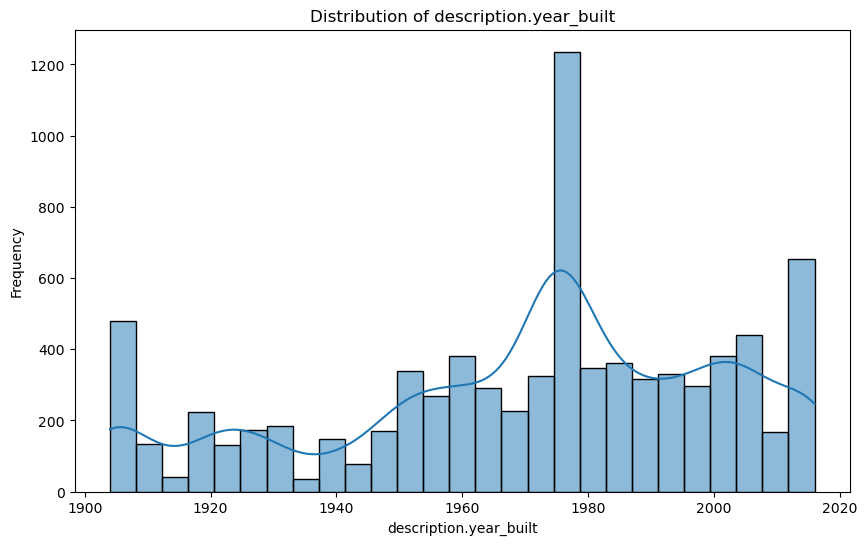

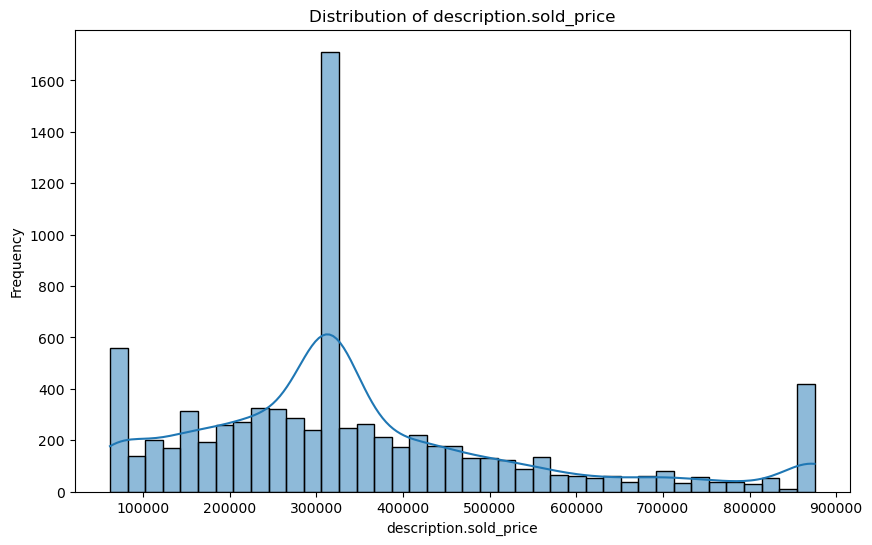

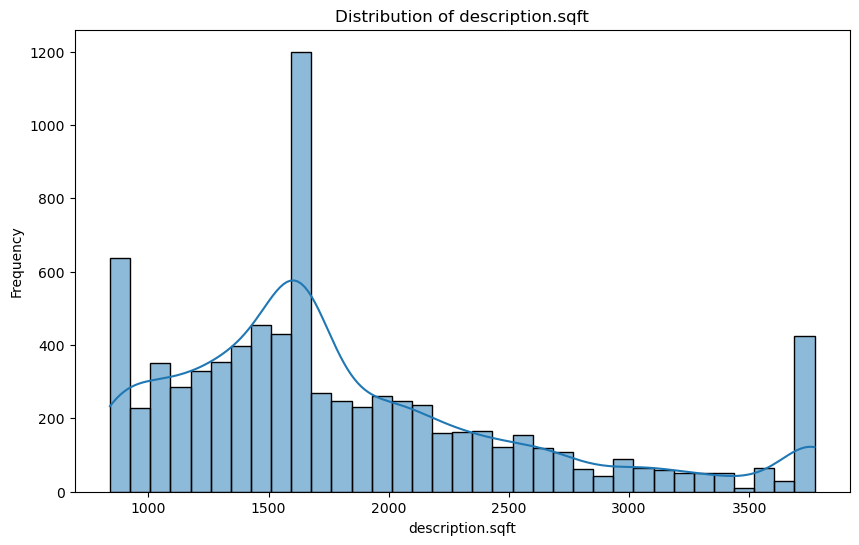

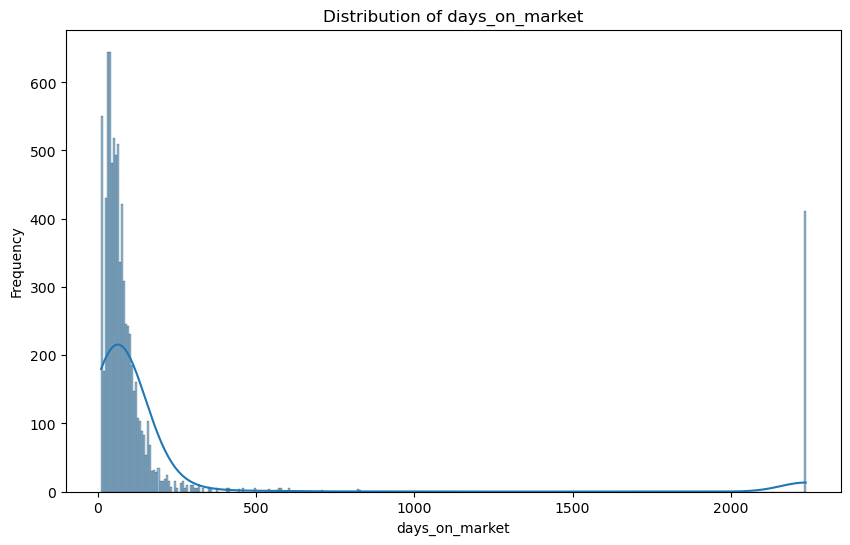

In [87]:
# Function to plot distributions of specified columns
def plot_distributions(df):
    columns_to_plot = ['description.year_built', 'description.sold_price', 'description.sqft', 'days_on_market']
    for col in columns_to_plot:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column {col} not found in DataFrame")

plot_distributions(df)

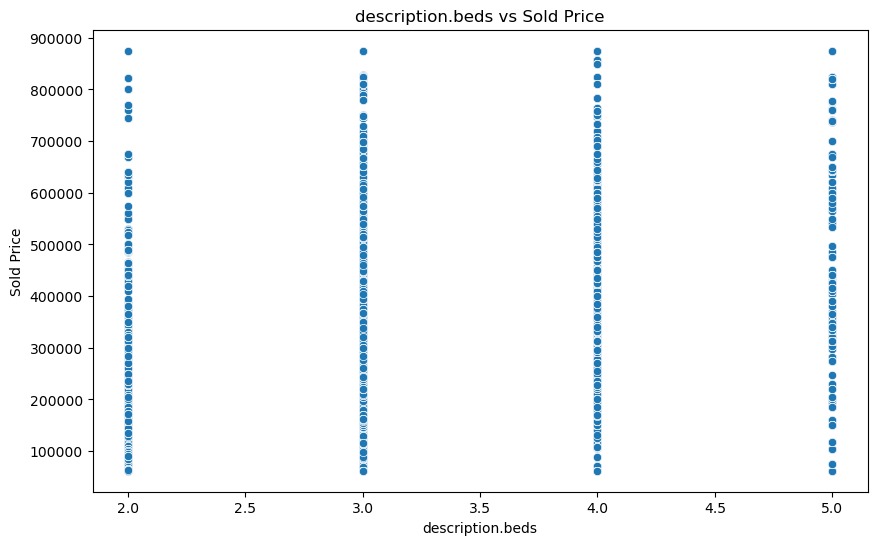

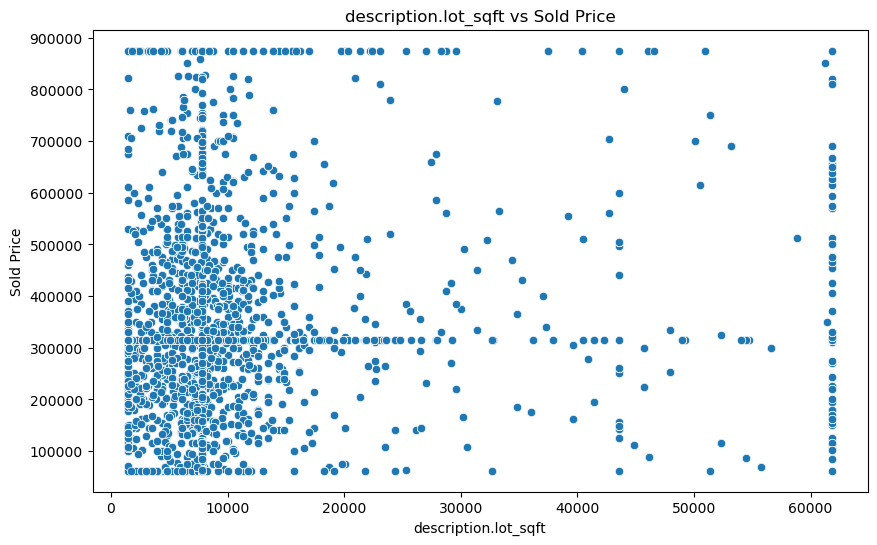

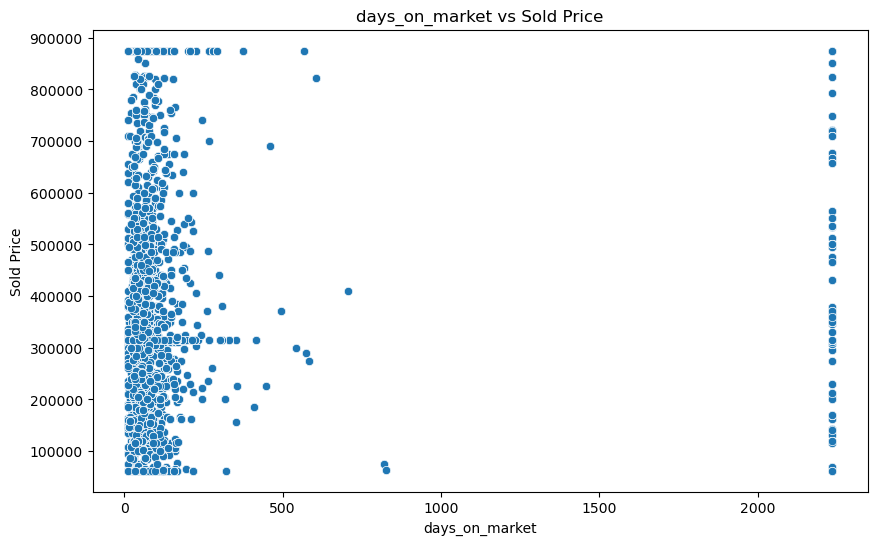

In [89]:
# Scatterplots for Numerical Variables and Target
def plot_scatterplots(df):
    features = ['description.beds', 'description.lot_sqft', 'days_on_market']
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['description.sold_price'])
        plt.title(f'{feature} vs Sold Price')
        plt.xlabel(feature)
        plt.ylabel('Sold Price')
        plt.show()

plot_scatterplots(df)

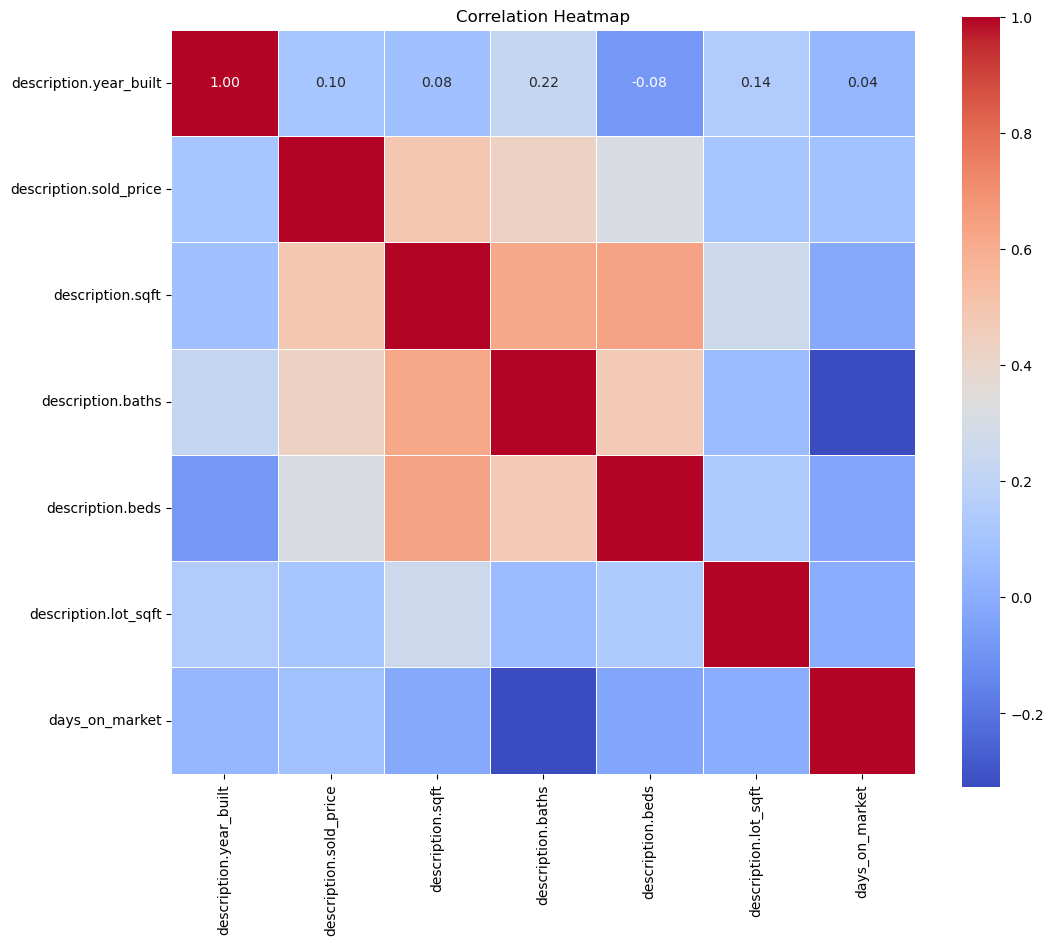

In [90]:
# Correlation Heatmap
def plot_selected_correlation_heatmap(df, features):
    # Compute the correlation matrix
    corr = df[features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

selected_features = ['description.year_built', 'description.sold_price', 'description.sqft', 
                     'description.baths', 'description.beds', 'description.lot_sqft', 
                     'days_on_market']

plot_selected_correlation_heatmap(df, selected_features)

C:\Users\16476\AppData\Local\Temp\ipykernel_31180\350889650.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\16476\AppData\Local\Temp\ipykernel_31180\350889650.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))


Features to drop: ['location.address.state_Alabama', 'location.address.state_Alaska', 'location.address.state_Arizona', 'location.address.state_Arkansas', 'location.address.state_California', 'location.address.state_Colorado', 'location.address.state_Connecticut', 'location.address.state_Delaware', 'location.address.state_Florida', 'location.address.state_Georgia', 'location.address.state_Hawaii', 'location.address.state_Idaho', 'location.address.state_Illinois', 'location.address.state_Indiana', 'location.address.state_Iowa', 'location.address.state_Kansas', 'location.address.state_Kentucky', 'location.address.state_Louisiana', 'location.address.state_Maryland', 'location.address.state_Massachusetts', 'location.address.state_Michigan', 'location.address.state_Minnesota', 'location.address.state_Missouri', 'location.address.state_Montana', 'location.address.state_Nebraska', 'location.address.state_Nevada', 'location.address.state_New Hampshire', 'location.address.state_New Jersey', 'lo

c:\Users\16476\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


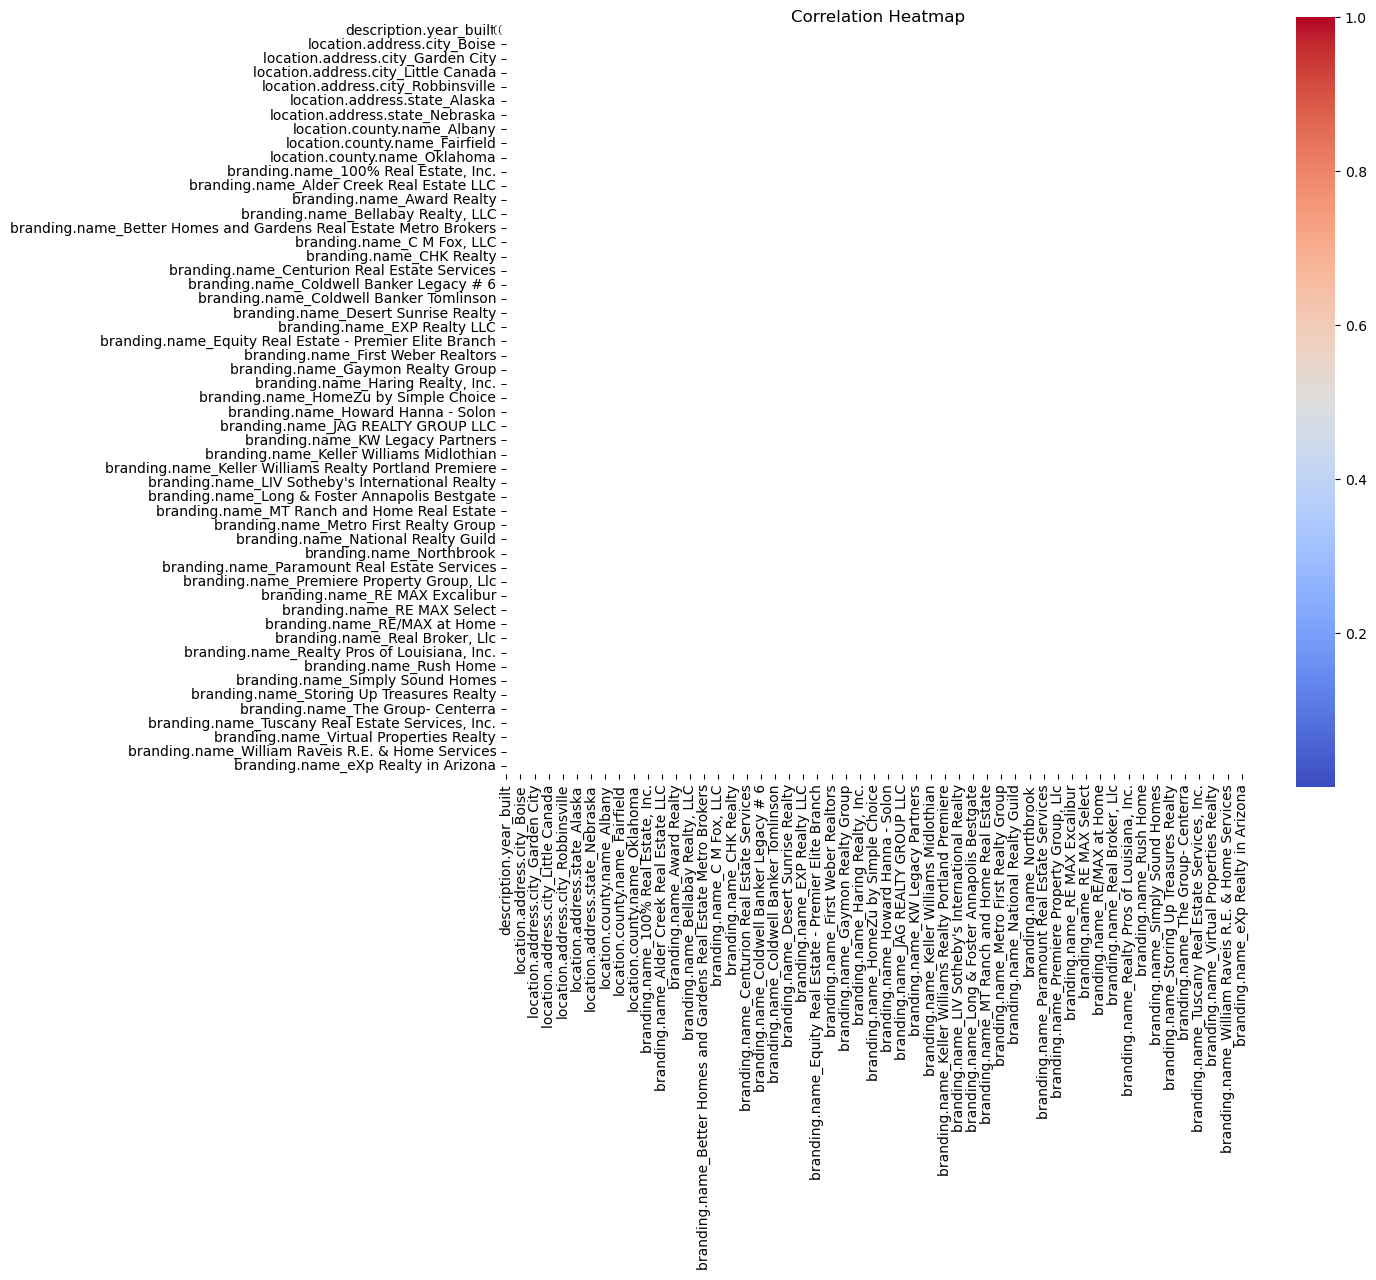

In [92]:
# Redundant Features
# Compute the correlation matrix
corr_matrix = df.corr().abs()

# Set the threshold for high correlation
threshold = 0.85

# Identify columns to drop
upper_triangle = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

print(f"Features to drop: {to_drop}")

# Drop the redundant features from the dataframe
df_reduced = df.drop(columns=to_drop)

print(f"Remaining features after dropping redundant ones: {df_reduced.columns.tolist()}")

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

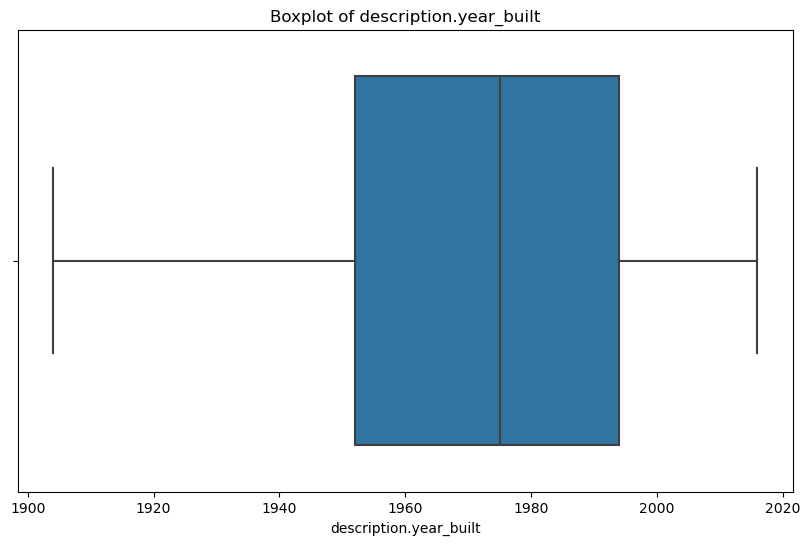

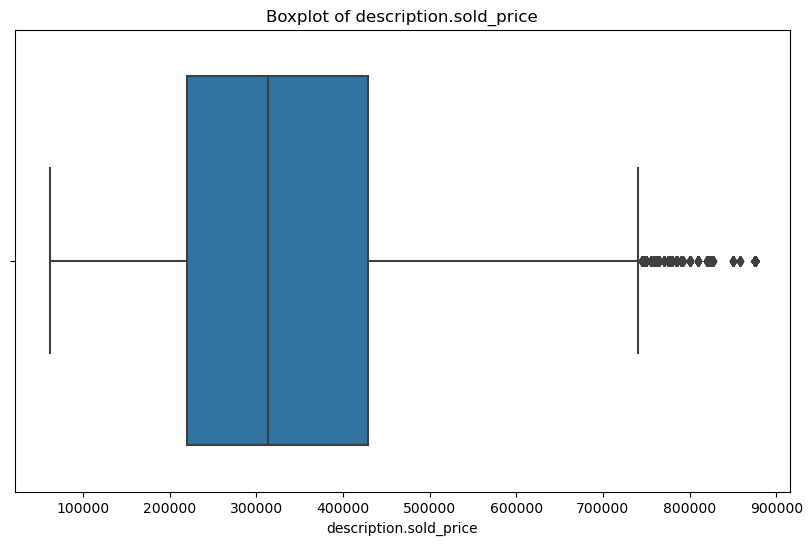

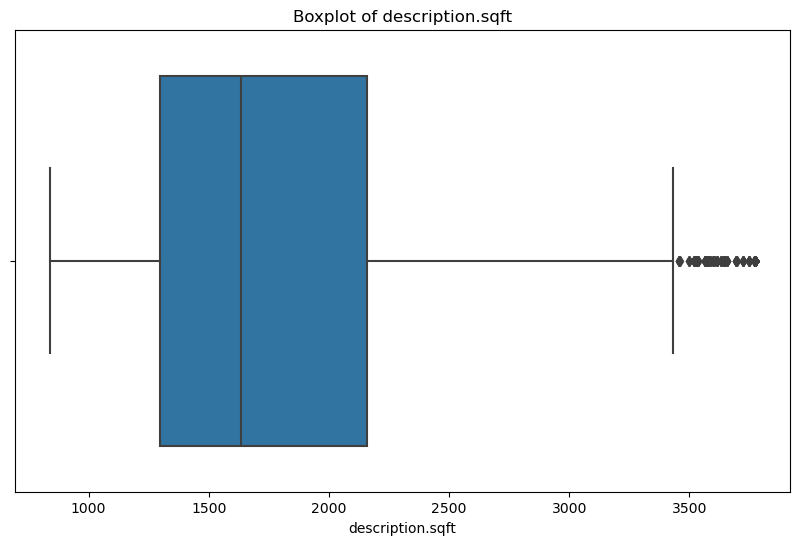

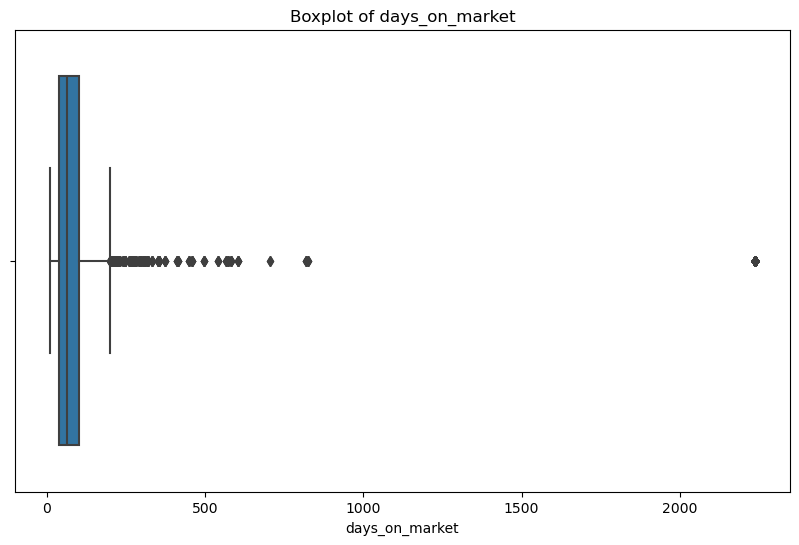

In [93]:
# Function to create boxplots for specified columns
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Columns for which to create boxplots
columns_to_plot = [
    'description.year_built',
    'description.sold_price',
    'description.sqft',
    'days_on_market'
]

# Plot boxplots
plot_boxplots(df, columns_to_plot)

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized